<a href="https://colab.research.google.com/github/Okkimaze/Okkimaze/blob/main/LE1_Carurucan_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/machine.csv')

In [ ]:
df.head()

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   VendorName  208 non-null    object
 1   ModelName   208 non-null    object
 2   MYCT        208 non-null    int64 
 3   MMIN        208 non-null    int64 
 4   MMAX        208 non-null    int64 
 5   CACH        208 non-null    int64 
 6   CHMIN       208 non-null    int64 
 7   CHMAX       208 non-null    int64 
 8   PRP         208 non-null    int64 
 9   ERP         208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [ ]:
df = df.drop_duplicates()

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64


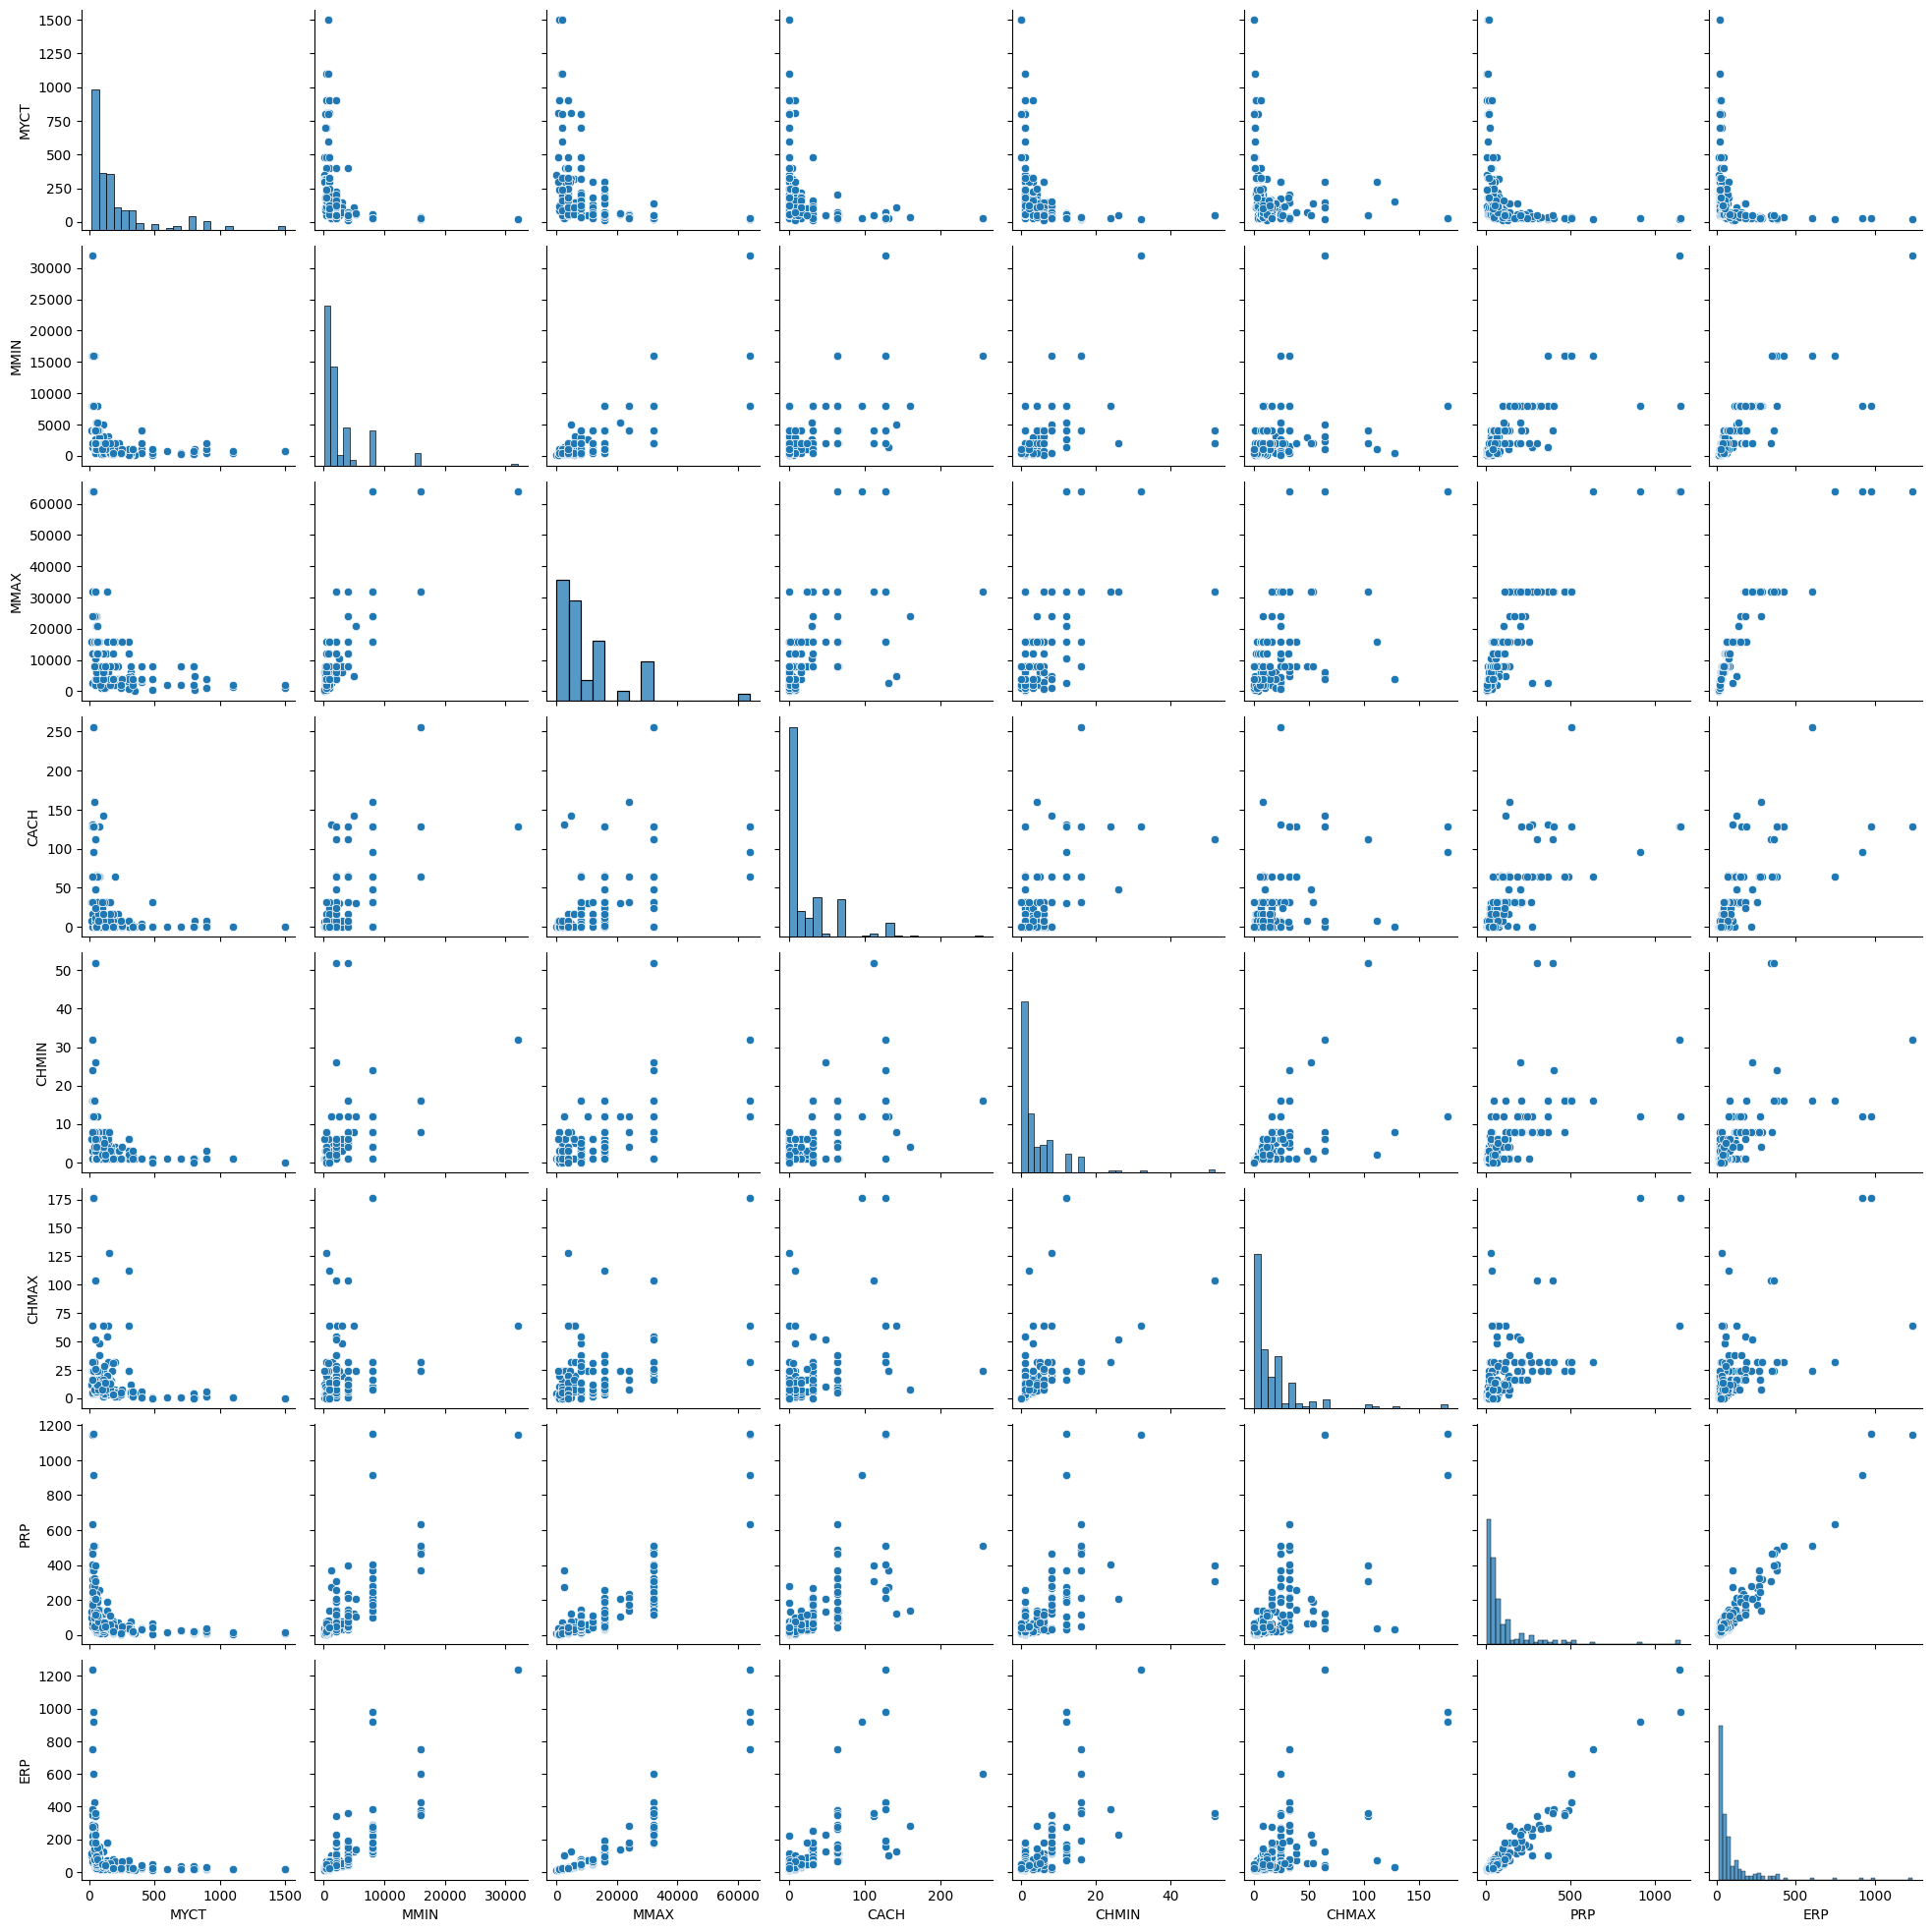

In [ ]:
sns.pairplot(df)

In [ ]:
X = df[['CACH','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]

y = df['ERP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Absolute Error: ", rmse)
print("R-squared (R^2) Score:", r2)
print("Mean Absolute Error: ", mae)

Mean Squared Error (MSE): 2521.9347330359537
Root Mean Absolute Error:  50.21886829704502
R-squared (R^2) Score: 0.9132964102220977
Mean Absolute Error:  33.49050054106625


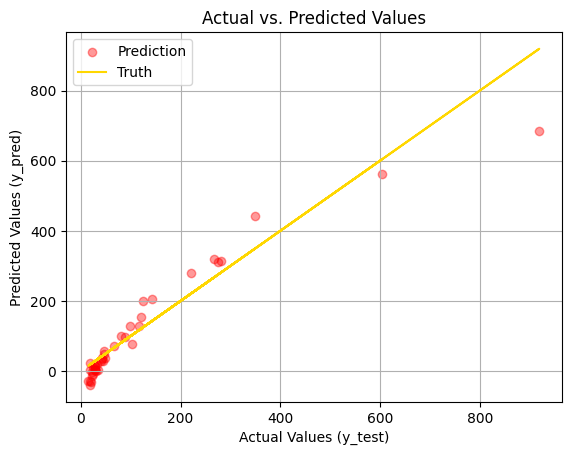

In [ ]:
plt.scatter(y_test, y_pred, color='red', alpha=0.4, label='Prediction')

plt.plot(y_test, y_test, color='gold', label='Truth')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
filename = 'LE1_Carurucan_JM.joblib'

pickle.dump(model, open('LE1_Carurucan_JM.joblib', 'wb'))


In [229]:
loaded_model = pickle.load(open('LE1_Carurucan_JM.joblib', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9132964102220977
